# Analysis of Ford Bike Sharing Data in Francisco Bay Area by Odimegwu David


## Introduction

This project, analysis of Ford bike sharing data in the San Francisco Bay Area, is carried out to satisfy the requirements for the Udacity Nanodegree on Data Analysis. 

The dataset was provided by Udacity in the file `fordgobike.csv'. 

## Data Collection

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import geopandas as gpd

%matplotlib inline 


In [2]:
ford = pd.read_csv("fordgobike.csv")

Getting the top 5 rows

In [3]:
ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## Data Wrangling

### Database structure

Let's investigate how many data points and features we have in the dataset.

In [4]:
# getting the number of rows or data points
print("There are", ford.shape[0], "rows in the dataset.")
print("There are", ford.shape[1], "features in the dataset.")

There are 183412 rows in the dataset.
There are 16 features in the dataset.


### Main features of interest in the dataset

I noticed that to answer the analysis questions, I have to use all the features of the dataset. I would also do some feature engineering to get some derived features in the dataset. So, no feature will be removed from the dataset. 

For the analysis questions, all the features will support my analysis. 

### Data Assessment

Some of the features have to be cleaned to make the data a quality one. 

First of all, I have to assess the dataset programmatically for mismatched datatypes. 

In [5]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

Next checking for missing data

In [6]:
ford.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

Checking for duplicate data

In [7]:
sum(ford.duplicated())

0

There are no duplicated rows. That's good. 

Quality Issues:
1. start_time and end_time are in the wrong datatype, object. It has to be a datetime type. 
2. start_station_id, end_station_id, and bike_id should be strings and not float. 
3. member_birth_year should be strings and not float
4. bike_share_for_all_trip should be boolean and not object datatype.  


### Data Cleaning

I will use the define - Code - Test cycle to resolve each of the data quality issues discovered in the assessment phase. 

Define:
Convert start_time and end_time to the datetime datatype from the object type. 

Code:

In [8]:
# Convert start_time and end_time to datetime objects
ford['start_time'] = pd.to_datetime(ford['start_time'])
ford['end_time'] = pd.to_datetime(ford['end_time'])


Test:

In [9]:
# use .info to check for converted datatypes
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

Define: 
Convert member_birth_year, start_station_id, and end_statioin_id to string and not float.  


Code:

In [10]:
# Convert member_birth_year to string
ford['member_birth_year'] = ford['member_birth_year'].astype(str)
# Convert start_station_id to string
ford['start_station_id'] = ford['start_station_id'].astype(str)
# Convert end_station_id to string
ford['end_station_id'] = ford['end_station_id'].astype(str)
# convert bike_id to string
ford['bike_id'] = ford['bike_id'].astype(str)

Test:

In [11]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

Define:
Convert bike_share_for_all_trip to boolean datatype and not strings.

Code:

In [12]:
# Convert bike_share_for_all_trip to boolean
ford['bike_share_for_all_trip'] = ford['bike_share_for_all_trip'].map({'Yes': True, 'No': False})


Test:

In [13]:
ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,False
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,nan,NaN,False
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,False
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,False
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,True


Define:
Remove the decimal placeholders from end_station_id, start_station_id and member_birth_year.

Code:

In [14]:
def removedecimals(x):
    x = x.replace('.', '')
    x = x[:-1]
    return x     

In [15]:
# remove decimal placeholders from member_birth year
ford['member_birth_year'] = ford['member_birth_year'].apply(removedecimals)
# remove decimal placeholders from start_station_id
ford['start_station_id'] = ford['start_station_id'].apply(removedecimals)
# remove decimal placeholders from end_station_id
ford['end_station_id'] = ford['end_station_id'].apply(removedecimals) 

Test:

In [16]:
ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,False
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,na,NaN,False
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,False
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,False
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,True


## Exploratory Data Analysis (EDA)

I will use the Question - Visualization - Observation framework to carry out the exploratory data analysis. The analysis will be divided into three categories:

1. Univariate EDA
2. Bivariate EDA
3. Multivariate EDA

Hence, conclusions and insights will be derived from each. 

### Univariate EDA

We'll be examining single variables or features and observing their charts. 

In [17]:
ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,False
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,na,NaN,False
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,False
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,False
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,True


Question 1:

What stations did members rent bike from regularly at their start of their bike sharing journey? 

To explore this question, I will be taking the top 20 stations since there are a lot of stations. 

Visualization 1:

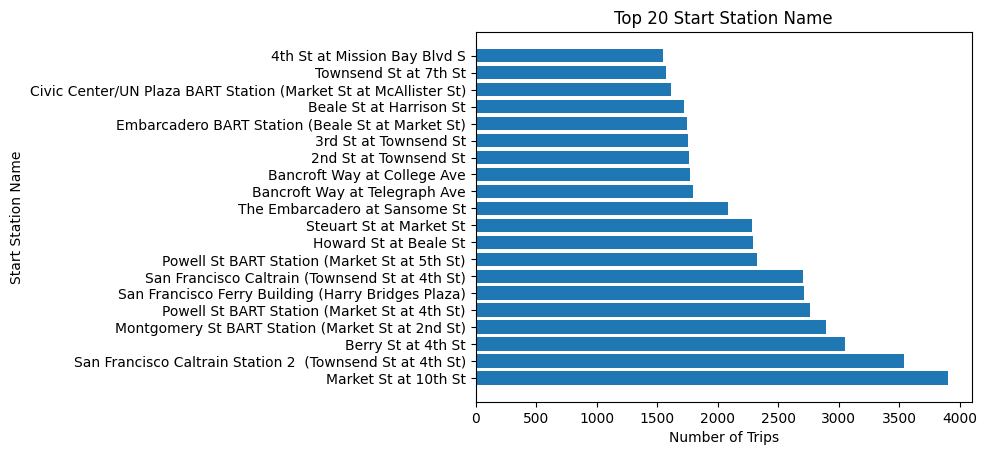

In [18]:
# get the top 20 start_station_name in descending order
top_20_start_station_name = ford['start_station_name'].value_counts().head(20)
# plot a horizontal bar chart using matplotlib
plt.barh(top_20_start_station_name.index, top_20_start_station_name.values)
plt.xlabel('Number of Trips')
plt.ylabel('Start Station Name')
plt.title('Top 20 Start Station Name')
plt.show()

Observation 1:

We notice that the following stations were notable for the start of bike trips. The list is in descending order.
1. Market St at 10th St
2. San Francisco Caltrain Station 2 (Townsend St at 4th St)
3. Berry St at 4th St
4. Montgomery St BART Station (Markeet St at 2nd St)
5. Powell St BART Station (Market St at 4th St)

Question 2:

What stations had the highest record of bike returns after a trip? 

Visualization 2:

The visualization will be constrained to the top 20 stations. 

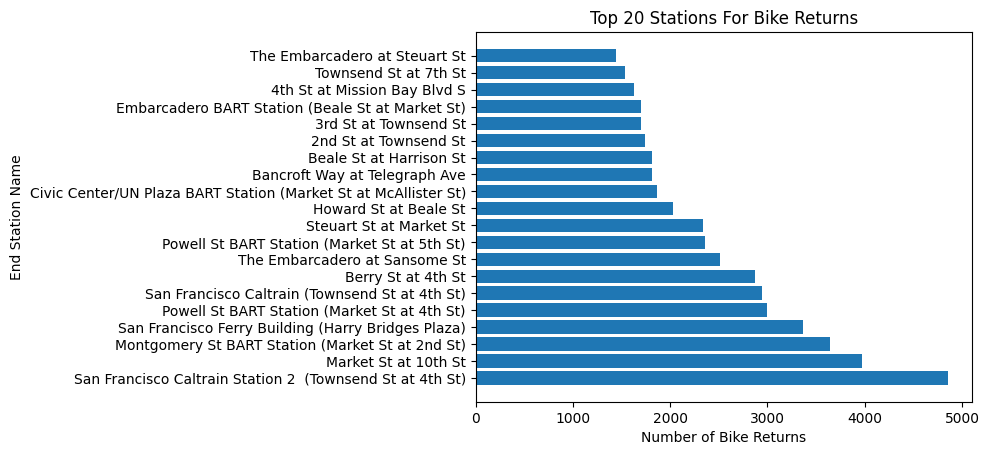

In [19]:
# get the top 20 end_station_name in descending order
top_20_end_station_name = ford['end_station_name'].value_counts().head(20)

# plot a horizontal bar chart using matplotlib
plt.barh(top_20_end_station_name.index, top_20_end_station_name.values)
plt.xlabel('Number of Bike Returns')
plt.ylabel('End Station Name')
plt.title('Top 20 Stations For Bike Returns')
plt.show()


Observation 2:

It is observed that the stations for bike starting trips also were among the top 20 for the stations recorded in the bike returns. So one can conclude that bikers tend to return their bikes to the stations where they got it from. It is quite noticeable that Market St at 10th St and San Francisco Caltrain Station 2 (Townsend St at 4th St) were the topmost stations in both starting trips and bike returns. 

### Question 3:

What bike was rented most frequently?

Visualization 3:

Getting the bike rented most frequently would give us an idea of what bike renters prefer most. 

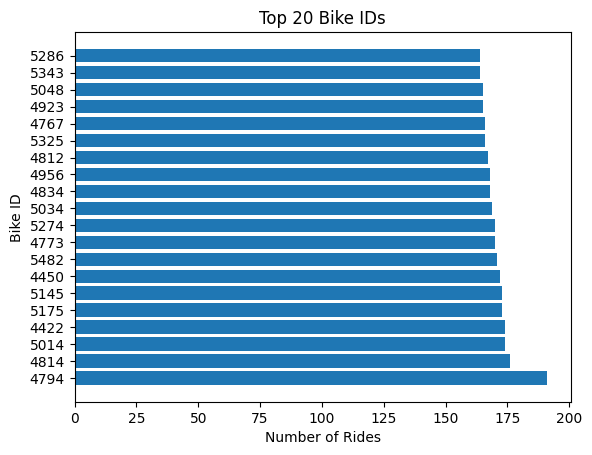

In [20]:
# get the top 20 bike_id in descending order
top_20_bike_id = ford['bike_id'].value_counts().head(20)

# plot a horizontal bar chart using matplotlib
plt.barh(top_20_bike_id.index, top_20_bike_id.values)
plt.xlabel('Number of Rides')
plt.ylabel('Bike ID')
plt.title('Top 20 Bike IDs')
plt.show()

Observation 3:

It was observed that bike ID 4794 had the highest frequency of rides and was followed by bike ID 4814.

### Question 4

What is the age distribution of bike members?

Visualization 4:

To create this visualization, we have to do a little feature engineering. We have to convert the member_birth_year column create a derived column age with 2023 as benchmark. 

In [21]:
def age(x):
    if x == 'na':
        return np.nan 
    else:
        member_age = int(2023 - int(x))
        return member_age    

In [22]:
ford['age'] = ford['member_birth_year'].apply(age)

In [23]:
ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,False,39.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,na,NaN,False,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,False,51.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,False,34.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,True,49.0


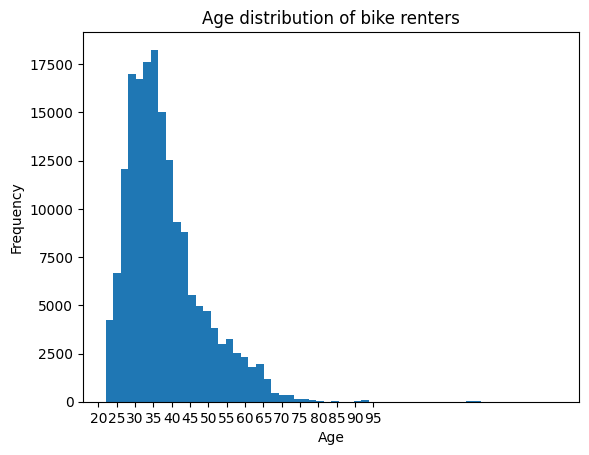

In [24]:
# Create a histogram of age
plt.hist(ford['age'], bins=60)

# Set the x-axis ticks to be 5 values apart
plt.xticks(range(20, 100, 5))
plt.title("Age distribution of bike renters")
plt.ylabel("Frequency")
plt.xlabel("Age")
# Show the plot
plt.show()


Observation 4:

It is observed that bike renters are mostly young people between 25 and 40, with the most frequent age been 35. It is also observed that senior citizens at their sixties and seventies are still bike renters.  

### Question 5

What is the gender distribution among bike share members?

Visualization 5:

This information helps us to see what gender are more active as bike share members and rent more bikes.

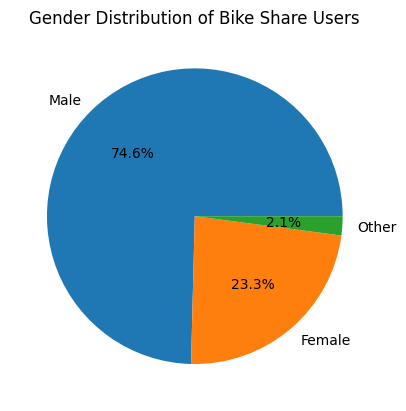

In [25]:
# create a new dataframe with only the member_gender column
df_gender = ford[['member_gender']]

# count the number of each gender in the dataframe
gender_counts = df_gender['member_gender'].value_counts()

# create a pie chart of the gender counts
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution of Bike Share Users')
plt.show()


Observation 5:
It is observed that males are 3 times as likely as females to rent a bike at the San Francisco Bay Area. The members whose gender are unlabeled, seen as "Other" in the pie chart, make a tiny fraction of the whole. 

Question 6:

What is the proportion of members who engage in bike sharing for all their trips as compared to those who don't?

Visualization:

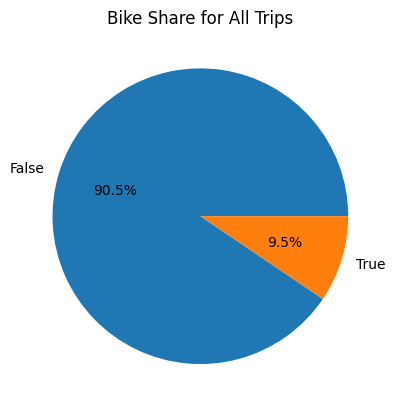

In [26]:
# Get the counts of bike_share_for_all_trip values
counts = ford['bike_share_for_all_trip'].value_counts()

# Plot a pie chart
plt.pie(counts, labels=['False', 'True'], autopct='%1.1f%%')
plt.title('Bike Share for All Trips')
plt.show()


Observation 6:

Generally, only a small proportion of members engage in bike sharing for all their trips. 

### Question 7

What day of the week were members likely to rent a bike?

Visualization 7:

To get this information, we first have to derive a column for day of the week from the start_time column.

In [27]:

# Create a new column for weekday from the start_time column
ford['weekday_start'] = ford['start_time'].dt.dayofweek


In [28]:
# map the numbers in weekday_start to names of the weekdays
weekdays_map = {0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"}
ford['weekday_start'] = ford['weekday_start'].map(weekdays_map)

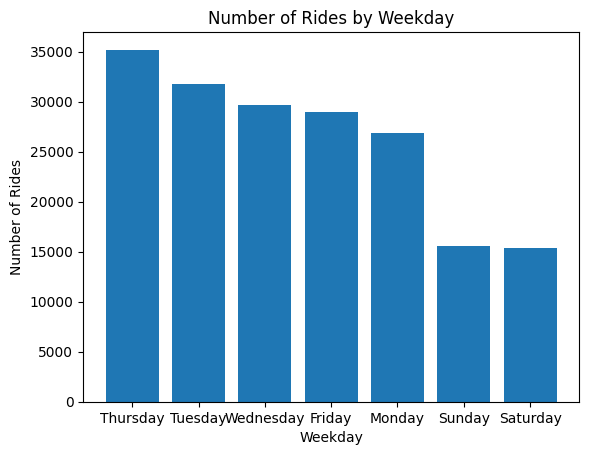

In [29]:
# Get the counts of each weekday_start value
weekday_counts = ford['weekday_start'].value_counts()

# Plot the bar chart
plt.bar(weekday_counts.index, weekday_counts.values)
plt.xlabel('Weekday')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by Weekday')
plt.show()

Observation 7:

We can see from the bar chart that members were more likely to take a bike on Thursday, followed by Tuesday. The midweek comes third. There were less rides during the weekend. The low turnout on weekends could be because schools and offices are closed during this time. 

### Question 8

What day of the week had the most rented bike returns?

Visualization 8: 

To create the visualization, we have to create a derived column, weekday_returns.

In [30]:

# Create a new column for weekday from the start_time column
ford['weekday_returns'] = ford['end_time'].dt.dayofweek
# map the numbers in weekday_start to names of the weekdays
weekdays_map = {0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"}
ford['weekday_returns'] = ford['weekday_returns'].map(weekdays_map)


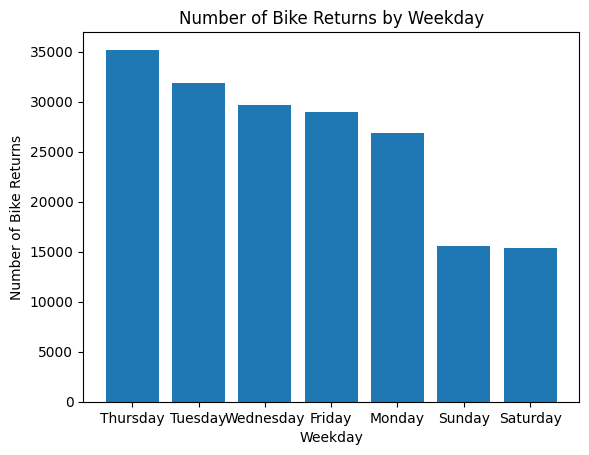

In [31]:
# Get the counts of each weekday_returns value
weekday_counts2 = ford['weekday_returns'].value_counts()

# Plot the bar chart
plt.bar(weekday_counts2.index, weekday_counts2.values)
plt.xlabel('Weekday')
plt.ylabel('Number of Bike Returns')
plt.title('Number of Bike Returns by Weekday')
plt.show()

Observation 8:

We see that the days for bike returns follows the same trend as that for bike rental days. That means most members usually return their bikes on the same day. 

### Question 9

At what hour of the day do members usually rent bikes? Morning, Afternoon, or evening?

Visualization 9:

To get the visualization, we will have to create a derived rent_hour column.

In [32]:
# Create a new column 'rent_hour' from the start_time column
ford['rent_hour'] = ford['start_time'].dt.hour

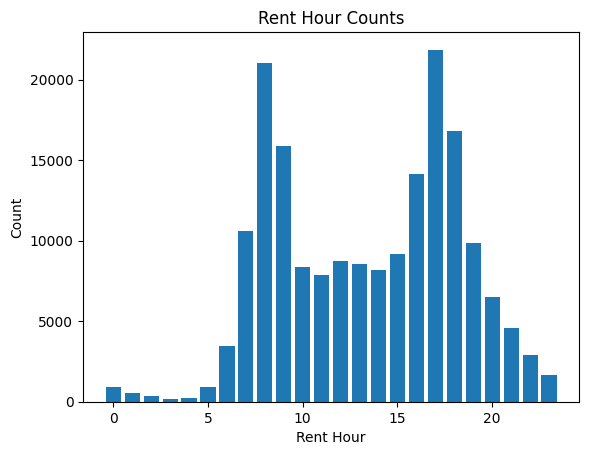

In [33]:
# Get the counts of each rent_hour value
rent_hour_counts = ford['rent_hour'].value_counts()

# Plot the bar chart
plt.bar(rent_hour_counts.index, rent_hour_counts.values)
plt.xlabel('Rent Hour')
plt.ylabel('Count')
plt.title('Rent Hour Counts')
plt.show()

Observation 9:

We notice that there are two time-peaks for bike rentals. The first peak is in the morning between 7-9 am and the second peak is in the evening between 4-6 pm. This follows the morning and evening shift for workers who use bikes to commute to work. 

### Question 10

At what hour of the day do members usually return bikes rented?

Visualization 10:

To create the visualizations, we need to create the returns_hour derived column. 

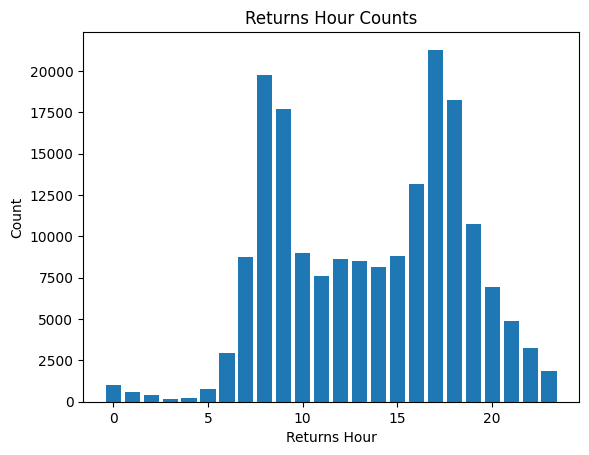

In [34]:
# Create a new column 'returns_hour' from the start_time column
ford['returns_hour'] = ford['end_time'].dt.hour
# Get the counts of each returns_hour value
returns_hour_counts = ford['returns_hour'].value_counts()

# Plot the bar chart
plt.bar(returns_hour_counts.index, returns_hour_counts.values)
plt.xlabel('Returns Hour')
plt.ylabel('Count')
plt.title('Returns Hour Counts')
plt.show()

Observation 10:

The trend for return hours follows that for the rent hours. 

### Question 11

What is the distribution of duration in minutes between the time a bike is rented and the time it is returned at the station?

Visualization 11:

To get the visualization, we'll convert the duration in seconds to minutes. Then plot a histogram for the minute duration. 

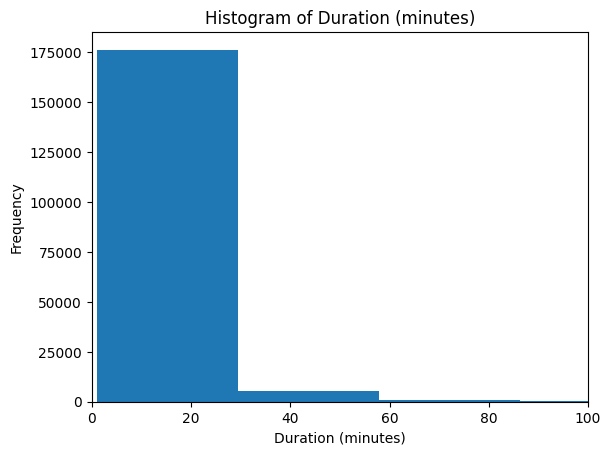

In [35]:

# Create a derived column, duration_minutes, by converting the values in 
# duration_sec to minute
ford['duration_minutes'] = ford['duration_sec']/60

# Plot the histogram of duration_minutes
plt.hist(ford['duration_minutes'], bins=50)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Duration (minutes)')
plt.xlim(0, 100)
plt.show()


Observation 11:

We can see that the bike durations that are above 60 minutes are very rare. Most of the trip durations are below 30 minutes. 

### Question 12

What is the distribution of distance traveled by bike users?

Visualization 12:

We will have to create a derived column, trip_distance, to plot the histogram. 

In [36]:
# using the haversine formula for calculating distance between 
# two coordinates in kilometres
from numpy import cos, sin, arcsin, sqrt
from math import radians
def haversine(row):
    lon1 = row['start_station_longitude']
    lat1 = row['start_station_latitude']
    lon2 = row['end_station_longitude']
    lat2 = row['end_station_latitude']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * arcsin(sqrt(a)) 
    km = 6367 * c
    return km

In [37]:
ford['trip_distance'] = ford.apply(lambda row: haversine(row), axis=1)

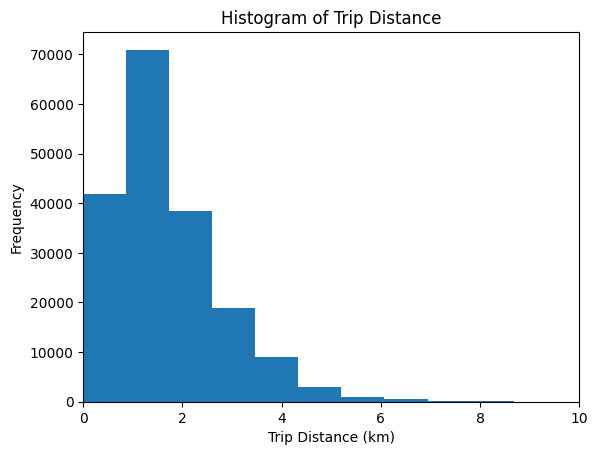

In [38]:
# Plot a histogram of trip_distance
plt.hist(ford['trip_distance'], bins=80)
plt.xlabel('Trip Distance (km)')
plt.ylabel('Frequency')
plt.title('Histogram of Trip Distance')
plt.xlim(0, 10)
plt.show()

Observation 12:

To confirm the time duration chart, most of the distances in this plot were short distances. Distances above 4 kilometers are rare while a major part of the distances fell within 1 kilometer. 

## Bivariate Exploratory Data analysis (Bivariate EDA)

Bivariate EDA is used to explore data between pairs of features. 

### Question 13

Which gender rides the most average distance between stations?

Visualization 13:

To do this, we need to create a new dataframe with the average distances for each gender group. 

In [39]:
# filter the rows based on whether they are males or females
ford2 = ford[ford['member_gender'].isin(['Male', 'Female'])]
# group the result by gender
ford2_group = ford2.groupby("member_gender")['trip_distance'].mean()
# convert the series to a dataframe
ford2 = ford2_group.to_frame()


In [41]:
# make member_gender index a column and reset index
ford2.reset_index(inplace=True)


In [43]:
# rename the columns appropriately
ford2.rename(columns={'member_gender': 'gender', 'trip_distance': 'average_distance'}, inplace=True)
ford2


,gender,average_distance
0,Female,1.764151
1,Male,1.661593


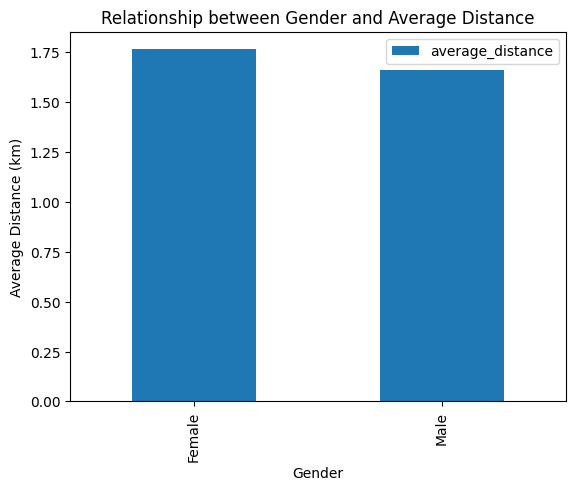

In [44]:
# plot the visualization
# Create a bar chart to show the relationship between gender and average distance
ford2.plot(kind='bar', x='gender', y='average_distance')

# Add labels and title to the plot
plt.title('Relationship between Gender and Average Distance')
plt.xlabel('Gender')
plt.ylabel('Average Distance (km)')

# Show the plot
plt.show()

Observation 13:

Although it was seen that males are 3 times more than females in riding bikes, females have a higher average travel distance between stations. Therefore, one can conclude the female bikers rent bikes for longer distances than males although they rent lesser number of times. 

### Question 14

What day of the week shows the highest average number of bike distances and lowest number of bike distances?

Visualization 14:

To get this information, we need to create a new dataframe for grouping the data by day of the week. 

In [45]:
# group by weekdays and take the mean of the distances
ford2_group = ford.groupby("weekday_start")['trip_distance'].mean()
# convert the series to a dataframe
ford2 = ford2_group.to_frame()
# make the index a column
ford2.reset_index(inplace=True)
# rename the columns
ford2.rename(columns={"weekday_start":"weekday", "trip_distance": "average_distance"}, inplace=True)
# sort the dataframe by the average distance
ford2.sort_values(by='average_distance', ascending=False, inplace=True)


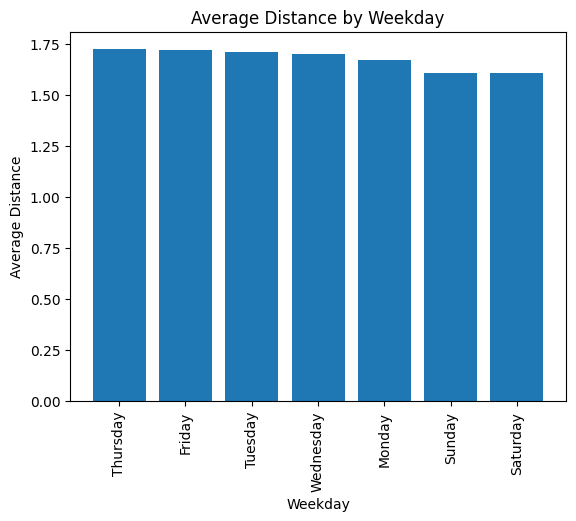

In [46]:
# Create a bar chart
plt.bar(ford2['weekday'], ford2['average_distance'])

# Add labels and title
plt.xlabel('Weekday')
plt.ylabel('Average Distance')
plt.title('Average Distance by Weekday')
plt.xticks(rotation=90)

# Show the plot
plt.show()

Observation 14:

It was observed that the highest average distances were traveled on Thursdays, Fridays, and Tuesdays. On weekends, there was less average distance traveled by bike members. 

### Interesting insights gained from features of interest in the bivariate EDA

1. Is it not interesting that the female gender are lesser in number (23%) compared to the male gender members (75%) but they ride greater distances on average than men? Does it mean they have more stamina, or is it related to the purpose of their travel? Maybe because males are comparatively higher, they make a greater part of people who use bikes for shorter distances like to work or the office. Females on the other hand might make use of bikes for visiting relatives at far distances. 

2. During the univariate analysis, we found that Fridays came at the fourth position when considering the number of rides or the weekday count. But during bivariate analysis, based on average distances, Fridays came second after Thursdays. We could say that these Friday trips are made mostly by women or the female gender. They could be using these trips to visit relatives or make long distance trips, compared to men who use bikes as commute to the office. 

## Multivariate Exploratory Data Analysis

This is an EDA carried out on three or more variables in a dataset. 

### Question 15

What is the distribution of weekly average distances traveled by gender. 

Visualization 15:

We need to group the data according to gender and weekdays. Then we take the mean distance traveled for each group. 

In [48]:
ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,age,weekday_start,weekday_returns,rent_hour,returns_hour,duration_minutes,trip_distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,1984,Male,False,39.0,Thursday,Friday,17,8,869.750000,0.544367
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,...,na,NaN,False,NaN,Thursday,Friday,18,6,708.683333,1.741905
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,1972,Male,False,51.0,Thursday,Friday,12,5,1030.900000,2.702847
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,1989,Other,False,34.0,Thursday,Friday,17,4,608.166667,0.260575
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,1974,Male,True,49.0,Thursday,Friday,23,0,26.416667,2.407789


In [54]:
# collect only the columns of interest
ford2 = ford[["member_gender", "weekday_start", "trip_distance"]]
# remove the uncategorized genders i.e other
ford2 = ford2[ford2["member_gender"].isin(["Male", "Female"])]
# group the dataframe by gender and then by weekday
ford2_group = ford2.groupby(["member_gender", "weekday_start"])["trip_distance"].mean()
# convert to a dataframe because it is now a series
ford2_group = ford2_group.to_frame()
# make the high level indices a colum
ford2_group.reset_index(inplace=True)
ford2_group

,member_gender,weekday_start,trip_distance
0,Female,Friday,1.782921
1,Female,Monday,1.749350
2,Female,Saturday,1.665224
3,Female,Sunday,1.659022
4,Female,Thursday,1.802916
5,Female,Tuesday,1.804243
6,Female,Wednesday,1.777142
7,Male,Friday,1.698200
8,Male,Monday,1.642544
9,Male,Saturday,1.594262


In [55]:
# rename the columns
ford2_group.rename(columns={"member_gender":"gender", "weekday_start": "weekday", "trip_distance":"average_distance"}, inplace=True)


,gender,weekday,average_distance
0,Female,Friday,1.782921
1,Female,Monday,1.749350
2,Female,Saturday,1.665224
3,Female,Sunday,1.659022
4,Female,Thursday,1.802916
5,Female,Tuesday,1.804243
6,Female,Wednesday,1.777142
7,Male,Friday,1.698200
8,Male,Monday,1.642544
9,Male,Saturday,1.594262


/home/emekadavid2/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


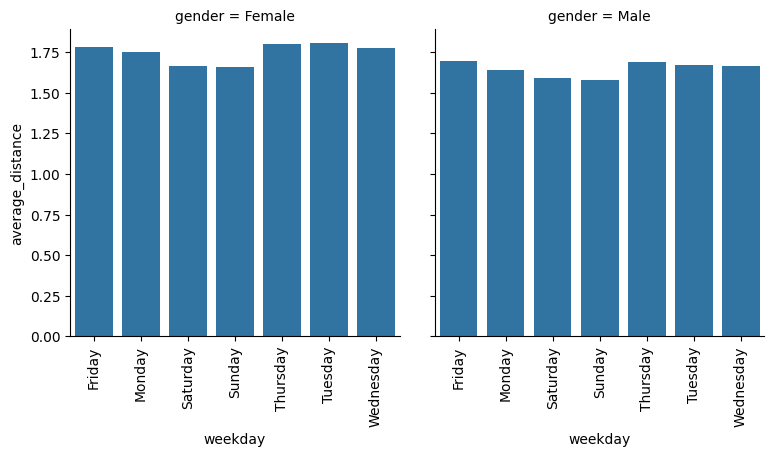

In [60]:
# plot the relationship in a facet
g = sns.FacetGrid(data=ford2_group, col='gender', height=4, aspect=1)
g.map(sns.barplot, "weekday", "average_distance")
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

Observation 15:

We can see that for both males and females, Thursdays, Tuesdays and Fridays are the days with the highest mean distance traveled. 

### Insights from features of interest during the multivariate analysis

Generally, thursdays are the best days for bike sharing and bike renting. For both females and males, thursdays are their preferred days to use bikes. The count of rides is the highest for thursdays, the average distance traveled is the highest for thursdays, and the gender distribution according to average distance traveled is the highest for both genders on thursdays. 

Therefore, a survey might have to be taken among bike users on why they like thursdays the most out of other days of the week. 

## Conclusions

The four steps of data analysis was carried out on this dataset. First, data was collected as provided by Udacity, then it was wrangled and cleaned, then exploratory data analysis was carried out on the data whle insights were drawn from the exploratory data analysis. 

As stated in the cells above, there was a noticeable pattern in weekdays bike use and rental. It was noted that thursdays was the most preferred days. While women take longer trips on Thursdays and Fridays, men take longer trips on thursdays and tuesdays. 

Also Market St station and San Francisco Caltrain Station 2 were the stations with the most activity among bikers. That means they are closer to people who prefer bikes as a means of commute. 

Further analysis:

To take this analysis further, in the future, I will like to model the relationship between bike sharing and trip distance, or average trip distance. Like, given some details about a bike sharing member, how probable is it that the member would rent bikes for a long or short distance. Well, that is for another day. 